In [28]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
#Usando rename para melhorar a identificação da coluna Droga
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [7]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [8]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [10]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [21]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], values=dados['g-0'],aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

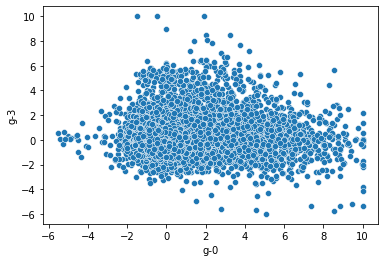

In [23]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

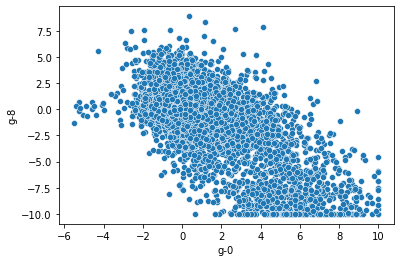

In [24]:
sns.scatterplot(x='g-0', y = 'g-8', data=dados)

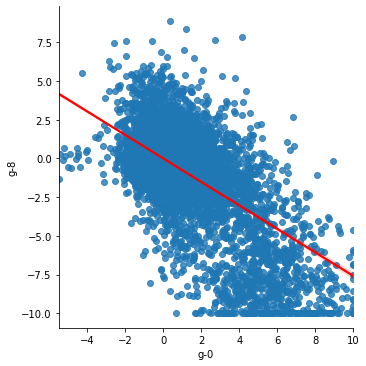

In [25]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

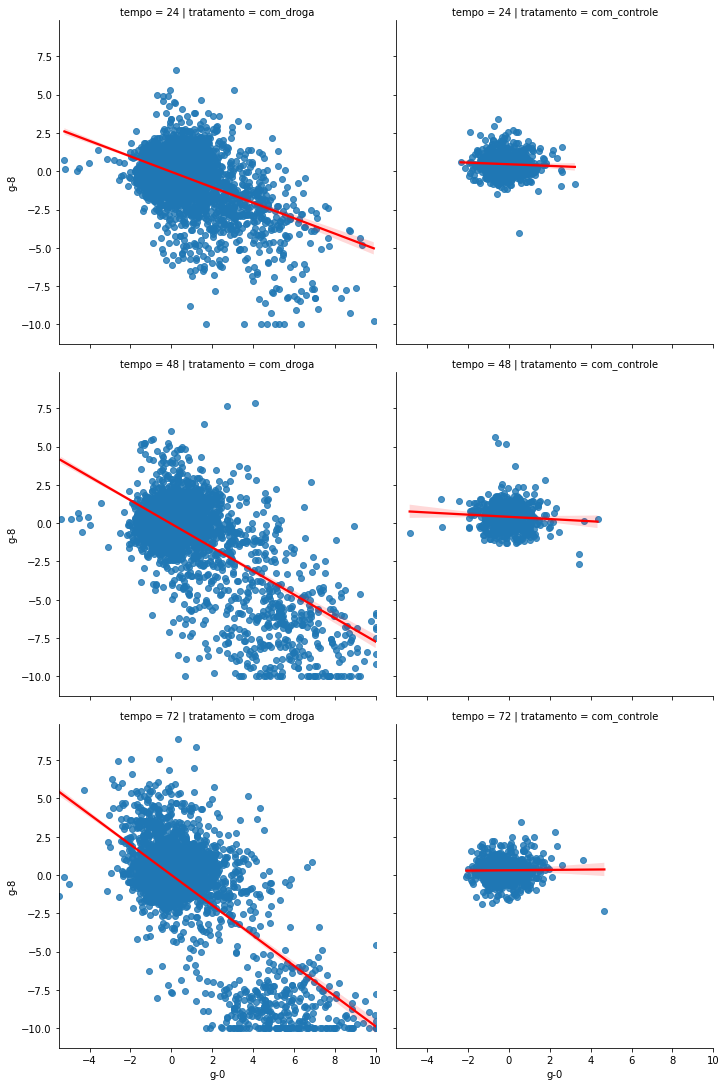

In [26]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

In [27]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

In [29]:
corr = dados.loc[:,'g-0':'g-50'].corr()

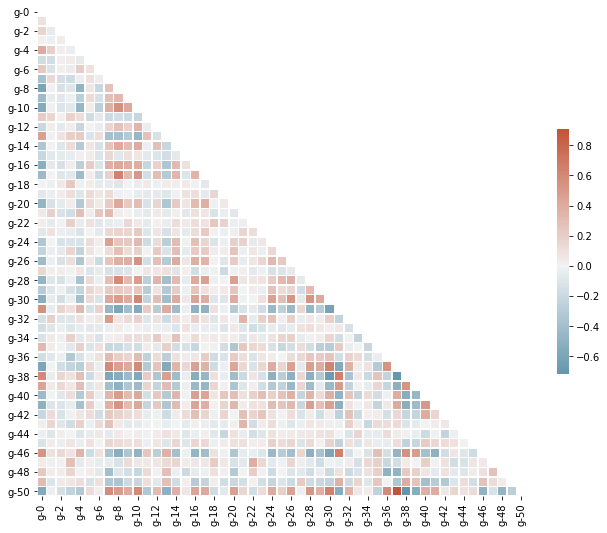

In [30]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

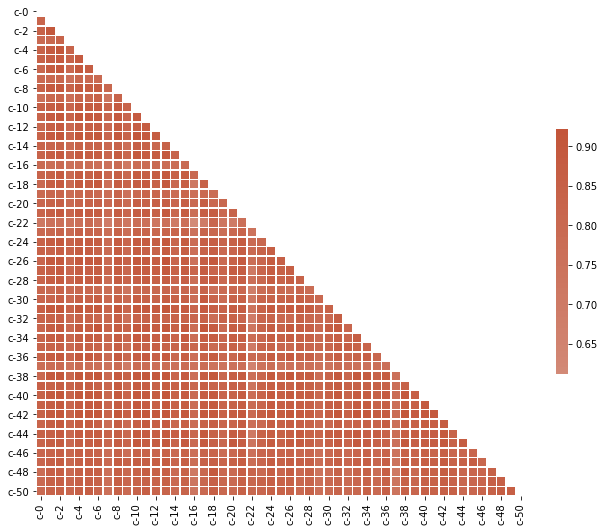

In [31]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [19]:
dados.groupby(['tempo','dose']).max()

id tratamento   composto  ...   c-97   c-98   c-99
tempo dose                                      ...                     
24    D1    id_fffcb9e7c  com_droga  fff7d208d  ...  2.748  3.111  3.120
      D2    id_fffb70c0c  com_droga  fff7d208d  ...  2.799  2.627  3.805
48    D1    id_fff7e6992  com_droga  fff7d208d  ...  2.751  1.910  2.870
      D2    id_fffc1c3f4  com_droga  fff7d208d  ...  2.924  1.945  1.949
72    D1    id_ffffdd77b  com_droga  fff7d208d  ...  2.152  1.864  2.497
      D2    id_fff1a3307  com_droga  fff7d208d  ...  2.321  2.147  2.022

[6 rows x 875 columns]

### Desafio 02: Normalizar o crosstab pela coluna.

### Desafio 03: Explorar outros agregadores.

### Desafio 04: Explorar o melt.

### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

### Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

### Desafio 07: Resumo do que você aprendeu com os dados